In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('smoke_detection_iot.csv')
df.sample(5)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
31819,31819,1654768168,18.84,55.32,224,400,13139,20045,939.624,0.41,0.42,2.81,0.439,0.010,6825,1
45331,45331,1654781680,24.40,53.70,1203,400,12959,19426,938.756,1.83,1.90,12.60,1.965,0.044,20337,1
25025,25025,1654761374,11.50,51.23,8,440,12482,19520,939.772,0.13,0.45,0.11,0.514,0.308,31,0
55232,55232,1654716277,31.48,56.41,3394,400,13236,19766,936.927,0.52,0.54,3.58,0.559,0.013,4090,0
42534,42534,1654778883,26.98,47.73,1168,410,12896,19439,938.740,1.37,1.42,9.43,1.471,0.033,17540,1


In [3]:
df.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [4]:
duplicates = df[df.duplicated(keep = False)]
duplicates

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm


In [163]:
df = df.drop_duplicates()

In [164]:
df = df.drop(['Unnamed: 0','UTC','CNT'],axis = 1)
df.sample(3)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
47375,25.530,54.22,1302,400,12974,19403,938.732,1.89,1.97,13.04,2.034,0.046,1
2376,18.899,47.70,14,400,13214,20136,939.597,1.06,1.10,7.29,1.137,0.026,0
24019,-13.790,48.26,1312,400,12994,19397,938.756,1.78,1.85,12.26,1.912,0.043,1


In [165]:
column_mean = df.mean()
column_std = df.std()
z_score = pd.DataFrame()
for i in df.columns:
    z_score[i] = (df[i]-column_mean[i])/column_std[i]
z_score

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,0.280619,0.994939,-0.248612,-0.141677,-2.335917,-2.024990,0.831754,-0.109042,-0.093340,-0.115214,-0.091923,-0.073888,-1.582444
1,0.281664,0.917108,-0.248612,-0.141677,-2.192779,-1.810064,0.838514,-0.109042,-0.093340,-0.115214,-0.091923,-0.073888,-1.582444
2,0.282639,0.837021,-0.248612,-0.141677,-2.086343,-1.624670,0.834008,-0.109042,-0.093340,-0.115214,-0.091923,-0.073888,-1.582444
3,0.283684,0.760318,-0.248612,-0.141677,-2.027619,-1.485215,0.832505,-0.109042,-0.093340,-0.115214,-0.091923,-0.073888,-1.582444
4,0.284728,0.693767,-0.248612,-0.141677,-1.979907,-1.367088,0.838514,-0.109042,-0.093340,-0.115214,-0.091923,-0.073888,-1.582444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,0.171842,-3.694094,-0.168603,-0.141677,2.864764,1.336710,-1.470431,-0.108360,-0.093011,-0.114201,-0.091620,-0.073874,-1.582444
62626,0.186814,-3.685070,-0.170267,-0.141677,2.894126,1.367882,-1.464422,-0.108381,-0.093021,-0.114234,-0.091629,-0.073874,-1.582444
62627,0.201717,-3.688454,-0.168347,-0.141677,2.872105,1.358038,-1.457662,-0.108425,-0.093036,-0.114288,-0.091645,-0.073875,-1.582444
62628,0.216760,-3.665894,-0.166939,-0.141677,2.824392,1.331788,-1.462920,-0.108425,-0.093041,-0.114295,-0.091648,-0.073875,-1.582444


In [166]:
"""for graph in z_score.columns:
    sns.histplot(z_score[graph])
    plt.ylabel('z_socre')
    plt.xlabel(graph)
    plt.title('z_score histogram of '+ graph)
    plt.show()"""

"for graph in z_score.columns:\n    sns.histplot(z_score[graph])\n    plt.ylabel('z_socre')\n    plt.xlabel(graph)\n    plt.title('z_score histogram of '+ graph)\n    plt.show()"

In [167]:
df.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'Fire Alarm'],
      dtype='object')

In [168]:
x = df.iloc[:,:-1].copy()
x.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5'],
      dtype='object')

In [169]:
y = df.iloc[:,-1:].copy()
y.columns

Index(['Fire Alarm'], dtype='object')

In [170]:
correlation_matrix = df.corr()
correlation_matrix

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.084916
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.128118


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

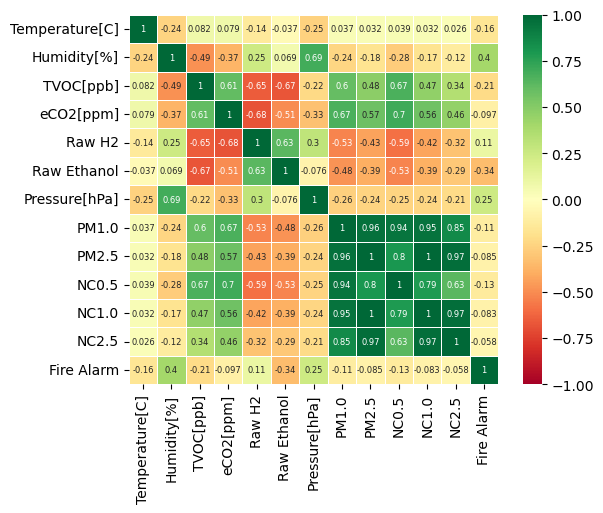

In [171]:
sns.heatmap(correlation_matrix,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 6})
plt.title

In [172]:
correlation_matrix = df.corr()

# Get column names with correlation above 0.6 for all pairs of columns
columns_above_threshold = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.6:
            columns_above_threshold.append((col1, col2))

# Remove duplicate pairs and sort by column names
columns_above_threshold = sorted(set(columns_above_threshold))

# Print the column names
for col1, col2 in columns_above_threshold:
    print(f"({col1}, {col2})")

(Humidity[%], Pressure[hPa])
(NC0.5, NC1.0)
(NC0.5, NC2.5)
(NC0.5, PM1.0)
(NC0.5, PM2.5)
(NC0.5, TVOC[ppb])
(NC0.5, eCO2[ppm])
(NC1.0, NC0.5)
(NC1.0, NC2.5)
(NC1.0, PM1.0)
(NC1.0, PM2.5)
(NC2.5, NC0.5)
(NC2.5, NC1.0)
(NC2.5, PM1.0)
(NC2.5, PM2.5)
(PM1.0, NC0.5)
(PM1.0, NC1.0)
(PM1.0, NC2.5)
(PM1.0, PM2.5)
(PM1.0, eCO2[ppm])
(PM2.5, NC0.5)
(PM2.5, NC1.0)
(PM2.5, NC2.5)
(PM2.5, PM1.0)
(Pressure[hPa], Humidity[%])
(Raw Ethanol, Raw H2)
(Raw Ethanol, TVOC[ppb])
(Raw H2, Raw Ethanol)
(Raw H2, TVOC[ppb])
(Raw H2, eCO2[ppm])
(TVOC[ppb], NC0.5)
(TVOC[ppb], Raw Ethanol)
(TVOC[ppb], Raw H2)
(TVOC[ppb], eCO2[ppm])
(eCO2[ppm], NC0.5)
(eCO2[ppm], PM1.0)
(eCO2[ppm], Raw H2)
(eCO2[ppm], TVOC[ppb])


In [173]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
print(len(x_train),len(x_test))

50104 12526


In [174]:
df['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [176]:
#flattened_arrays = [np.ravel(arr) for arr in y_train]
# Concatenate the flattened arrays into a 1-dimensional array
#y_train = np.concatenate(flattened_arrays)

In [177]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

C:\Users\sachi\AppData\Local\Temp\ipykernel_12964\3237980936.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier()

In [178]:
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3557
           1       1.00      1.00      1.00      8969

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



In [179]:
rfc.score(x_test,y_test)

0.9999201660546064

In [180]:
y_test_pred = rfc.predict(x_test)
pd.crosstab(pd.Series(y_test_pred, name = 'predicted'),pd.Series(y_test['Fire Alarm'],name = 'actual'))

actual,0,1
predicted,,
0,169,550
1,483,1373


In [181]:
rfc = RandomForestClassifier(class_weight = 'balanced')

In [182]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
df2 = rfc.fit(x_train_resampled, y_train_resampled)

C:\Users\sachi\AppData\Local\Temp\ipykernel_12964\131632059.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  df2 = rfc.fit(x_train_resampled, y_train_resampled)


In [183]:
df['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

<Axes: xlabel='Fire Alarm', ylabel='count'>

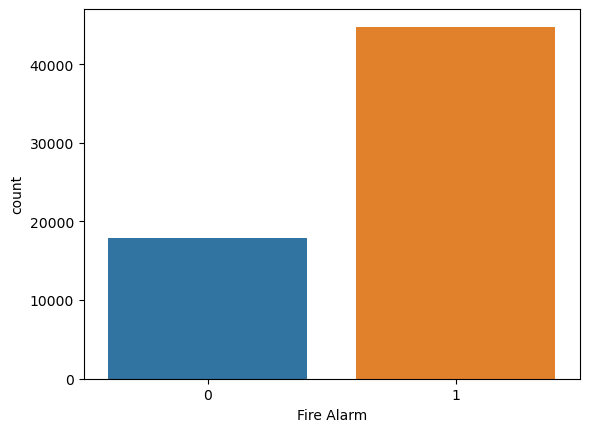

In [184]:
sns.countplot(x ='Fire Alarm', data = df)

In [185]:
x_train_resampled

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,26.880000,47.970000,1312,400,12961,19402,938.707000,2.100000,2.180000,14.450000,2.254000,0.051000
1,9.449000,46.230000,78,452,12784,20678,937.556000,2.310000,2.400000,15.920000,2.483000,0.056000
2,-10.306000,51.550000,1379,406,12957,19383,938.725000,1.680000,1.750000,11.580000,1.805000,0.041000
3,20.020000,55.700000,304,400,13116,19956,939.389000,0.230000,0.240000,1.600000,0.249000,0.006000
4,-19.825000,53.350000,1337,407,12969,19397,938.761000,1.970000,2.050000,13.550000,2.113000,0.048000
...,...,...,...,...,...,...,...,...,...,...,...,...
71571,19.322804,36.255817,8477,400,12935,19426,936.851061,0.370000,0.389877,2.549877,0.397963,0.009000
71572,-5.039458,47.007937,107,400,12796,20608,937.353978,1.940726,2.021396,13.356422,2.082866,0.047268
71573,10.065014,41.955015,153,422,12776,20561,937.342063,1.925619,2.001208,13.239030,2.064238,0.046471
71574,27.126620,44.190433,65,435,12845,20728,937.577426,2.154558,2.242425,14.858300,2.316506,0.052507


In [186]:
y_test_pred = rfc.predict(x_test)

In [187]:
pd.crosstab(pd.Series(y_test_pred, name = 'predicted'),pd.Series(y_test['Fire Alarm'],name = 'actual'))

actual,0,1
predicted,,
0,170,550
1,482,1373


In [188]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3557
           1       1.00      1.00      1.00      8969

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



# SMOTE

In [189]:
#unique, count = np.unique(y_train,return_counts = True)
#y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
#y_train_dict_value_count = {(unique, count)}
#y_train_dict_value_count

In [190]:
value_counts = y_train.value_counts()
counts = pd.DataFrame({'count':value_counts})
counts


,count
Fire Alarm,
1,35788
0,14316


In [191]:
sm = SMOTE(random_state = 12, sampling_strategy = 1.0)
x_train_res, y_train_res = sm.fit_resample(x_train,y_train)

In [192]:
value_counts_res = y_train_res.value_counts()
counts_res = pd.DataFrame({'count':value_counts_res})
counts_res

,count
Fire Alarm,
0,35788
1,35788


In [193]:
x_smote = x_train_res
y_smote = y_train_res

In [194]:
x_smote.head(5)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,26.880,47.97,1312,400,12961,19402,938.707,2.10,2.18,14.45,2.254,0.051
1,9.449,46.23,78,452,12784,20678,937.556,2.31,2.40,15.92,2.483,0.056
2,-10.306,51.55,1379,406,12957,19383,938.725,1.68,1.75,11.58,1.805,0.041
3,20.020,55.70,304,400,13116,19956,939.389,0.23,0.24,1.60,0.249,0.006
4,-19.825,53.35,1337,407,12969,19397,938.761,1.97,2.05,13.55,2.113,0.048


In [195]:
#unique, count = np.unique(y_train_res, return_counts = True)
#y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
#y_train_dict_value_count

In [196]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_smote)


StandardScaler()

In [197]:
x_train_res.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5'],
      dtype='object')

In [198]:
x_smote = scaler.transform(x_smote)
xsdf = pd.DataFrame(x_smote,columns = x_train_res.columns)
xsdf
#x_smote[:]

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,0.686160,0.103965,-0.138415,-0.158012,0.099980,-0.604823,0.180166,-0.132057,-0.114872,-0.137819,-0.113210,-0.090818
1,-0.535663,-0.068220,-0.259270,-0.135003,-0.438591,1.105159,-0.688427,-0.131867,-0.114775,-0.137542,-0.113120,-0.090813
2,-1.920387,0.458230,-0.131853,-0.155357,0.087809,-0.630285,0.193750,-0.132438,-0.115062,-0.138361,-0.113388,-0.090826
3,0.205309,0.868901,-0.237136,-0.158012,0.571610,0.137599,0.694832,-0.133751,-0.115728,-0.140244,-0.114002,-0.090855
4,-2.587620,0.636352,-0.135967,-0.154915,0.124322,-0.611524,0.220917,-0.132175,-0.114930,-0.137989,-0.113266,-0.090820
...,...,...,...,...,...,...,...,...,...,...,...,...
71571,-0.540082,-0.465734,-0.251533,-0.145180,-0.472061,0.952386,-0.848073,-0.132133,-0.114907,-0.137923,-0.113245,-0.090819
71572,0.702216,0.587703,-0.266909,-0.158012,0.334274,0.120177,0.972865,-0.133792,-0.115748,-0.140304,-0.114022,-0.090856
71573,1.059516,-2.863197,0.020342,-0.158012,0.282546,0.034410,-1.231660,-0.132985,-0.115340,-0.139148,-0.113644,-0.090838
71574,-2.513935,-3.448335,0.184191,-0.158012,1.490527,-0.182688,-1.351226,-0.133335,-0.115519,-0.139651,-0.113809,-0.090846


In [208]:
#scaler.fit(y_smote)

In [209]:
x_test = scaler.transform(x_test)
x_tesr_sc = pd.DataFrame(x_test)
x_tesr_sc

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Humidity[%]
- NC0.5
- NC1.0
- NC2.5
- PM1.0
- ...
Feature names seen at fit time, yet now missing:
- Fire Alarm


In [201]:
#y_test_sc = scaler.transform(y_test)
#y_test_df = pd.DataFrame(y_test_sc, columns = y_test)
#y_test_df

In [202]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(xsdf,y_smote)


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [204]:
y_test_pred = LR.predict(x_test)

In [205]:
len(y_test)

12526

In [206]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred)

array([[3557,    0],
       [8964,    5]], dtype=int64)

In [207]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.28436851349193676

In [ ]:
pd.crosstab(pd.Series(y_test_pred, name = 'predicted'),pd.Series(y_test['Fire Alarm'],name = 'actual'))

In [ ]:
print(classification_report(y_test,y_test_pred))

In [ ]:
weights = np.linspace(0.005,0.25,10)
weights

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#pipe = pipeline.fit(SMOTE(),LogisticRegression())
#pipe = Pipeline([('smote', smote),('classifier', LogisticRegression())])
#weights = np.linspace(0.005,0.25,100)
#gsc = GridSearchCV(estimator = pipe, param_grid = {'smote_ratio':weights},scoring = 'f1', cv = 3)
#grid_results = gsc.fit(x_train,y_train)
#gsc = GridSearchCV(estimator=pipe, param_grid={'smote__sampling_strategy': weights}, scoring='f1', cv=3)
#pipe = Pipeline([('smote', smote), ('classifier', LogisticRegression())])
#weights = np.linspace(0.005, 0.25, 100)
#param_grid = {'smote__sampling_strategy': weights}
#gsc = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='f1', cv=3)
#grid_results = gsc.fit(x_train, y_train)
#grid_results = gsc.fit(x_train, y_train)
#print('best parameter is' % grid_result.best_params_)
#weight_f1_score_df = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],'weight':weights})
#weight_f1_score_df.plot(x='weight')